# <b> 1. Introduction
    
    
    
    



In [220]:
%%html
<img src="boston_unv.jpg" ,width=600, height=500>

Since 2008 AirBnB offered an unique way of arrangement for lodging, primarily home stays or tourism experience to the guests and hosts. The company does not own any of the real estate listings, nor does it host events; it acts as a broker, receiving commissions from each booking. Kaggel provide this dataset, it describes the listing activity and metrics in Boston, MA for 2019. This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.

In [221]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
pd.set_option("max_columns", None)

In [222]:
# read csv data files in dataframes
##df_cal = pd.read_csv('calendar.csv')
df_listings = pd.read_csv("listings.csv")

#### Hover on Listing data

In [223]:
df_listings.head()


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

#### Checking attribute listing of the data frame and data type 

In [224]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [225]:
# check statistics of numerical columns 
df_listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,3575.000000,3576.000000,56.000000,3585.000000,3585.000000,3.585000e+03,0.0,3585.00000,3585.000000,3585.000000,3585.000000,3585.000000,2772.000000,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,1.255944,1.609060,858.464286,1.429847,3.171269,2.872584e+04,NaN,8.64993,21.833194,38.558159,179.346444,19.044630,91.916667,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,8.516813e-01,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,0.753060,1.011745,608.874310,1.056787,8.874133,1.670136e+06,NaN,10.43533,21.860966,33.158272,142.136180,35.571658,9.531686,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,NaN,0.00000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,1.000000,1.000000,415.000000,1.000000,1.000000,3.650000e+02,NaN,0.00000,0.000000,0.000000,19.000000,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,1.000000,1.000000,825.000000,1.000000,2.000000,1.125000e+03,NaN,4.00000,16.000000,37.000000,179.000000,5.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,2.000000,2.000000,1200.000000,1.000000,3.000000,1.125000e+03,NaN,15.00000,40.000000,68.000000,325.000000,21.000000,98.250000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,5.000000,16.000000,2400.000000,14.000000,300.000000,1.000000e+08,NaN,30.00000,60.000000,90.000000,365.000000,404.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


#### NULL values 

NULL values have adverse effect on data analysis and prediction 

In [226]:
pd.DataFrame(np.sum(df_listings.isnull()), columns=['null_count']).sort_values(by='null_count', ascending=False)

,null_count
has_availability,3585
license,3585
neighbourhood_group_cleansed,3585
jurisdiction_names,3585
square_feet,3529
...,...
is_location_exact,0
room_type,0
accommodates,0
bed_type,0


#### Checking % of NULL values for each attribute and showing the attributes where NULL% is more than 60%

In [227]:
Df_null=pd.DataFrame(((np.sum(df_listings.isnull()) / df_listings.shape[0]) * 100)  , columns=['null%']).sort_values(by='null%', ascending=False)

Df_null[Df_null['null%'] > 60] 


,null%
has_availability,100.000000
license,100.000000
neighbourhood_group_cleansed,100.000000
jurisdiction_names,100.000000
square_feet,98.437936
monthly_price,75.230126
weekly_price,75.118550
security_deposit,62.566248


#### Data cleaning for listing csv 

In [228]:
#drop columns where more than 70% column is null
df_listings = df_listings.drop(columns = df_listings.columns[df_listings.isna().mean() > 0.70])
#location data not useful as We are doing for Boston city only 

drop_cols =['thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'listing_url', 'host_url',
       'host_thumbnail_url', 'host_picture_url', 'country', 'country_code', 'neighbourhood',
       'smart_location', 'street', 'market', 'first_review', 'last_review', 'state', 'calendar_last_scraped',
       'calendar_updated', 'city', 'scrape_id', 'last_scraped', 'space', 'host_neighbourhood', 
        'neighborhood_overview', 'host_listings_count', 'zipcode', 'is_location_exact', 'host_location',
       'host_total_listings_count','country_code','state','experiences_offered']
df_listings = df_listings.drop(columns = drop_cols)

#### Cleaning monetory values 

In [229]:
#fixing price
df_listings['price'] = df_listings['price'].map(lambda p: int(p[1:-3].replace(",", "")))
#If Fee type is nan that is then We assume services are not chargable 
df_listings['cleaning_fee'] = df_listings['cleaning_fee'].fillna('$0.00').map(lambda p: int(p[1:-3].replace(",", "")))
df_listings['security_deposit'] = df_listings['security_deposit'].fillna('$0.00').map(lambda p: int(p[1:-3].replace(",", "")))
df_listings['extra_people'] = df_listings['extra_people'].fillna('$0.00').map(lambda p: int(p[1:-3].replace(",", "")))

#### Visualize the price

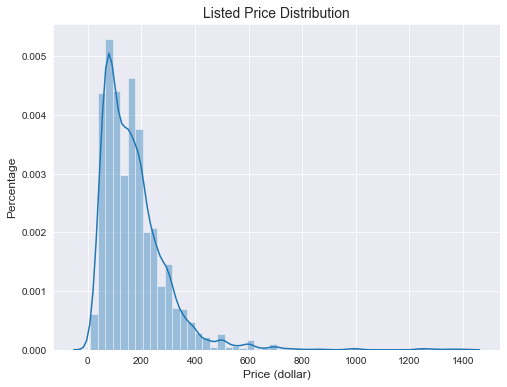

In [230]:

df_plot=df_listings[df_listings['price'] < 1501 ] 

sns.set_style('darkgrid')
plt.figure(figsize=(8, 6))
sns.distplot(df_plot['price'] , bins=50, kde=True)
plt.ylabel('Percentage', fontsize=12)
plt.xlabel('Price (dollar)', fontsize=12)
plt.title('Listed Price Distribution', fontsize=14);

In [231]:

df_listings.room_type.value_counts()

Entire home/apt    2127
Private room       1378
Shared room          80
Name: room_type, dtype: int64

#### Related factor for price 

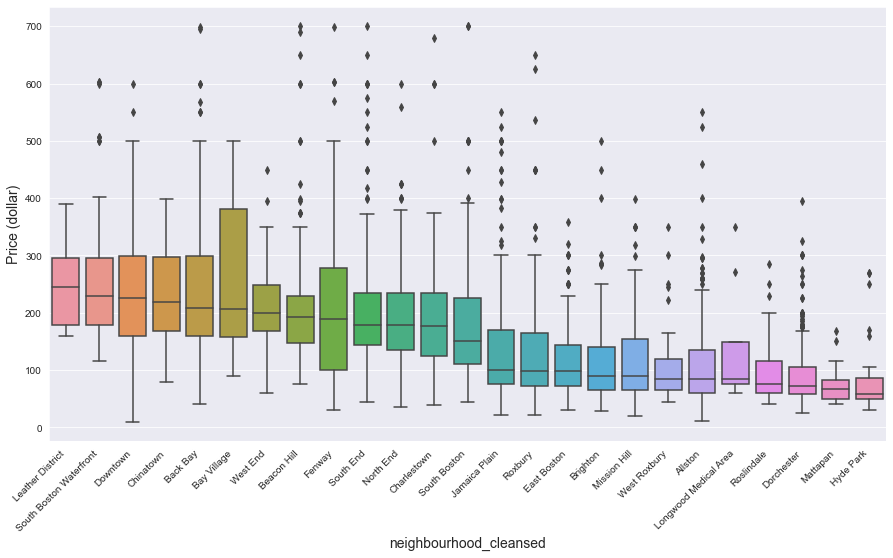

In [232]:
sort_order =df_listings.query('price <= 700').groupby('neighbourhood_cleansed')['price'].median().sort_values(ascending=False)\
                    .index
plt.figure(figsize=(15,8))
sns.boxplot(y='price', x='neighbourhood_cleansed', data=df_listings.query('price <= 700'), 
            order=sort_order)
plt.ylabel('Price (dollar)', fontsize=14)
plt.xlabel('neighbourhood_cleansed', fontsize=14)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.show()

Average price with Neighbour hood 

<Figure size 1080x576 with 0 Axes>

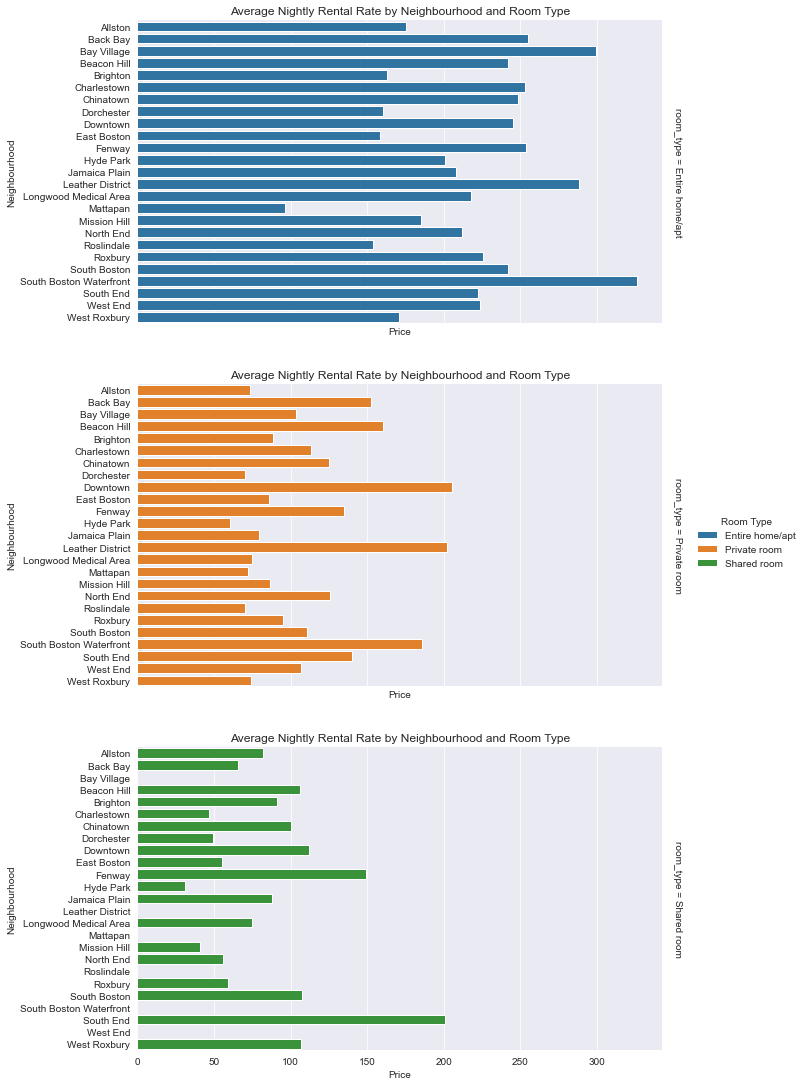

In [233]:
#Unique and sorted neighbourhood 
neighbourhood_list=df_listings["neighbourhood_cleansed"].dropna().unique()
sorted_neighbourhood=sorted(neighbourhood_list)

# create clustered bar plot for average price by Neighbourhood and room type
plt.figure(figsize=(15,8))
p=sns.FacetGrid(df_listings,row="room_type",hue="room_type",height=5,aspect=2,margin_titles=True)
p.map(sns.barplot,"price","neighbourhood_cleansed",ci=None,order=sorted_neighbourhood).fig.subplots_adjust(wspace=.07, hspace=.2)
p.add_legend(title="Room Type")
p.set(xlabel="Price",ylabel="Neighbourhood",title="Average Nightly Rental Rate by Neighbourhood and Room Type")
plt.show()
 

In [237]:
df_listings['price'].describe()

count    3585.000000
mean      173.925802
std       148.331321
min        10.000000
25%        85.000000
50%       150.000000
75%       220.000000
max      4000.000000
Name: price, dtype: float64

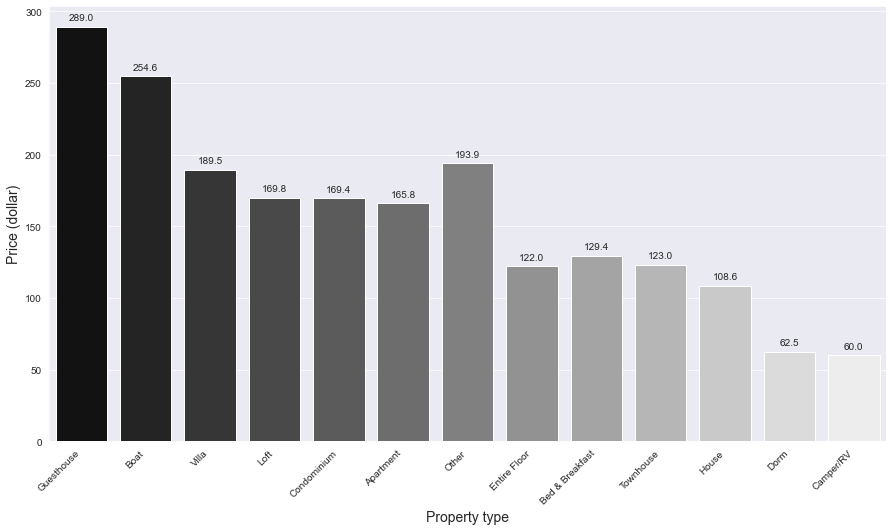

In [238]:
sort_order =df_listings.query('price <= 400').groupby('property_type')['price'].median().sort_values(ascending=False)\
                    .index
plt.figure(figsize=(15,8))
splot=sns.barplot(y='price', x='property_type', data=df_listings.query('price <= 400'), order=sort_order,palette='gist_yarg_r',ci=None)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
plt.ylabel('Price (dollar)', fontsize=14)
plt.xlabel('Property type', fontsize=14)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

Average price  for property type

#### Price  related to ameneties 

In [239]:
df_listings['amenities'] = df_listings['amenities'].map(
    lambda amns: "|".join([amn.replace("}", "").replace("{", "").replace('"', "")\
                           for amn in amns.split(",")])
)

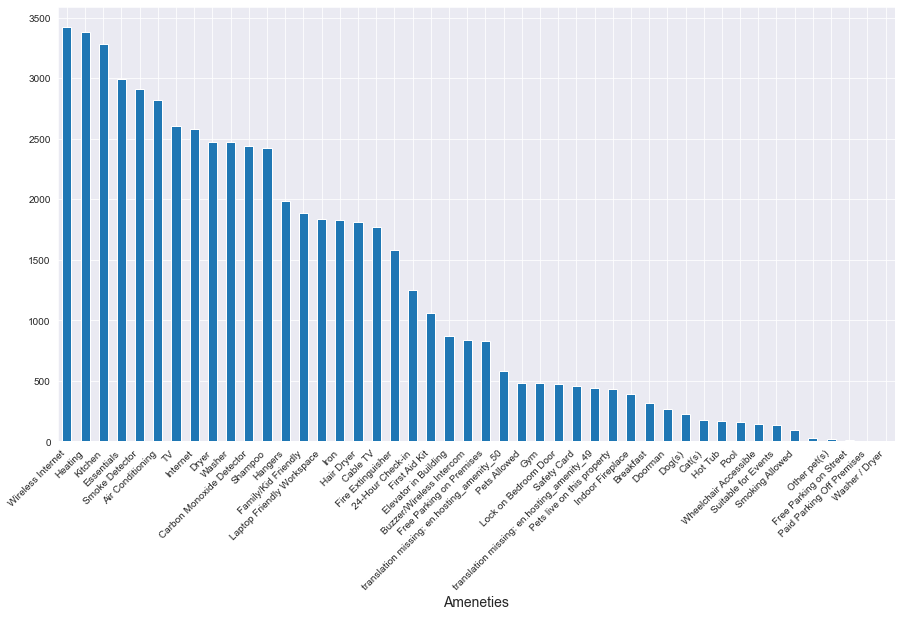

In [240]:
plt.figure(figsize=(15,8))
pd.Series(np.concatenate(df_listings['amenities'].map(lambda amns: amns.split("|"))))\
    .value_counts()\
    .plot(kind='bar')

plt.xlabel('Ameneties', fontsize=14)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)
plt.show()

BnB provided amenties, sorted by number of BnB providing

In [241]:
amenities = np.unique(np.concatenate(df_listings['amenities'].map(lambda amns: amns.split("|"))))

amenity_prices = [(amn, df_listings[df_listings['amenities'].map(lambda amns: amn in amns)]['price'].mean()) for amn in amenities if amn != ""]
amenity_srs = pd.Series(data=[a[1] for a in amenity_prices], index=[a[0] for a in amenity_prices])


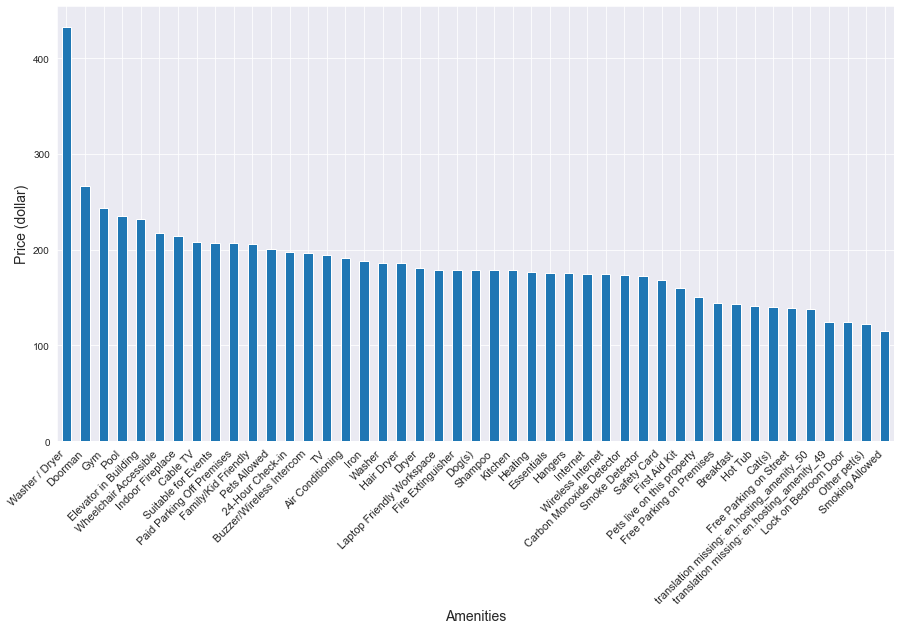

In [242]:
plt.figure(figsize=(15,8))
amenity_srs.sort_values(ascending=False).plot(kind='bar')
ax = plt.gca()
plt.ylabel('Price (dollar)', fontsize=14)
plt.xlabel('Amenities', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=11)
plt.show()

#### Explore Calendar data

In [243]:
# read csv data files in dataframes
df_cal = pd.read_csv('calendar.csv')

In [245]:
df_cal.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [246]:
df_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


Two important findings , date stored as character and most of the price column is null

In [247]:
# convert date from character object to datetime object

df_cal["date"] = pd.to_datetime(df_cal["date"])
df_cal.date.describe()


count                 1308890
unique                    365
top       2016-12-27 00:00:00
freq                     3586
first     2016-09-06 00:00:00
last      2017-09-05 00:00:00
Name: date, dtype: object

In [248]:
# calendar is coded as f and t string objects
df_cal.available.value_counts()

f    665853
t    643037
Name: available, dtype: int64

In [249]:
# convert f to 0 (not available), and t to 1 (available)
df_cal["available"]=df_cal["available"].apply(lambda x:1 if x=="t" else 0)
df_cal.available.value_counts()

0    665853
1    643037
Name: available, dtype: int64

To Compute availability (percentage of units available) of to each day
and Store in cal_daily dataframe

In [250]:
cal_daily = df_cal.groupby("date")["available"].agg(["sum","mean"]).reset_index()

cal_daily.rename(columns={"sum":"available_count","mean":"availability"},inplace=True)                                         

cal_daily.head()

,date,available_count,availability
0,2016-09-06,570,0.158951
1,2016-09-07,932,0.259900
2,2016-09-08,999,0.278583
3,2016-09-09,981,0.273564
4,2016-09-10,956,0.266592


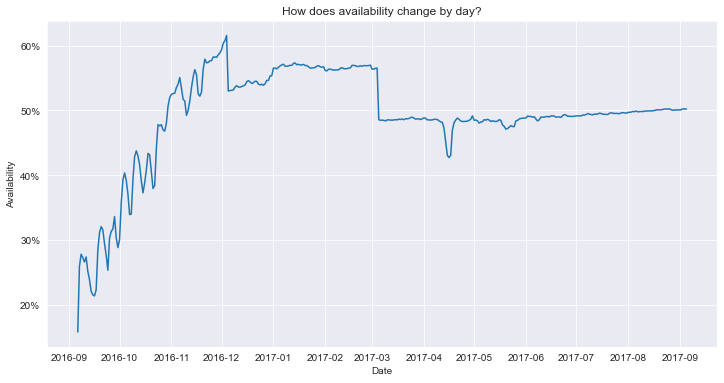

In [251]:
plt.figure(figsize=(12,6))

ax=sns.lineplot(x=cal_daily.date,y=cal_daily.availability)
ax.set(xlabel="Date",ylabel="Availability", title="How does availability change by day?")

# set y tick values to % 
y_tickvalue=['{:,.0f}'.format(x*100) + '%' for x in ax.get_yticks()]
ax.set_yticklabels(y_tickvalue)

# set x tick increments 
months = mdates.MonthLocator()
ax.xaxis.set_major_locator(months)

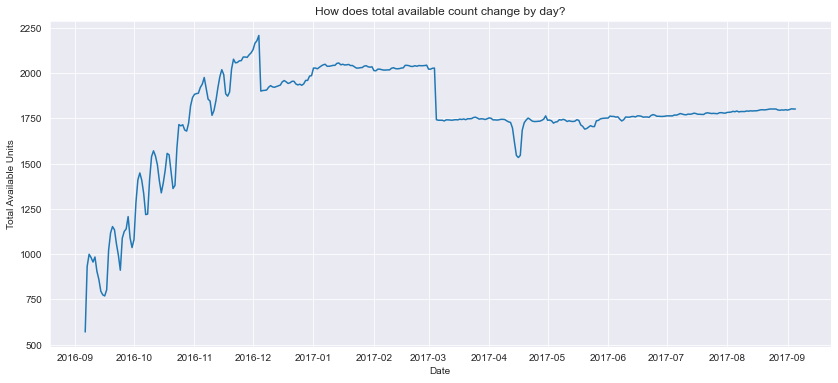

In [252]:
# check trend of available unit counts 

# view overall trend of availability by day
sns.set_style("darkgrid")
plt.figure(figsize=(14,6))

ax=sns.lineplot(x=cal_daily.date,y=cal_daily.available_count)
ax.set(xlabel="Date",ylabel="Total Available Units", title="How does total available count change by day?")

# set x tick increments 
months = mdates.MonthLocator()
ax.xaxis.set_major_locator(months)

#### Days wise trend in week

In [253]:
# explore trend throughout the week
df_cal["day_of_week"] = df_cal["date"].dt.dayofweek
cal_weekly = df_cal.groupby("day_of_week")["available"].agg(["sum","mean"]).reset_index()
cal_weekly.rename(columns={"sum":"available_count","mean":"availability"},inplace=True)
cal_weekly

,day_of_week,available_count,availability
0,0,92413,0.495586
1,1,93332,0.491071
2,2,91816,0.492385
3,3,91202,0.489092
4,4,90998,0.487998
5,5,91068,0.488374
6,6,92208,0.494487


[Text(0, 0, '48.7%'),
 Text(0, 0, '48.8%'),
 Text(0, 0, '48.9%'),
 Text(0, 0, '49.0%'),
 Text(0, 0, '49.1%'),
 Text(0, 0, '49.2%'),
 Text(0, 0, '49.3%'),
 Text(0, 0, '49.4%'),
 Text(0, 0, '49.5%'),
 Text(0, 0, '49.6%')]

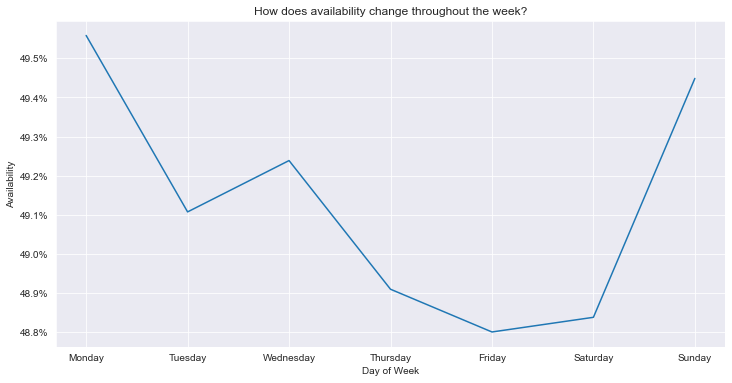

In [254]:
plt.figure(figsize=(12,6))
ax=sns.lineplot(x=cal_weekly.day_of_week,y=cal_weekly.availability)
ax.set(xlabel="Day of Week",ylabel="Availability", title="How does availability change throughout the week?")
ax.set_xticks([0,1,2,3,4,5,6])
ax.set_xticklabels(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])

# set y tick values to % 
y_tickvalue=['{:,.1f}'.format(x*100) + '%' for x in ax.get_yticks()]
ax.set_yticklabels(y_tickvalue)

In [255]:
df_m = df_listings.copy()
df_m.columns

Index(['id', 'name', 'summary', 'description', 'notes', 'transit', 'access',
       'interaction', 'house_rules', 'host_id', 'host_name', 'host_since',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities', 'price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'requires_license',
       'instant_

In [256]:
cols_Not_Useful = ['id','host_verifications','latitude','longitude']
df_m = df_m.drop(cols_Not_Useful, axis=1)
df_m.shape

(3585, 53)

In [257]:
# Identifying a subset of the fields in the list
df_sub = df_m[["host_is_superhost",'cancellation_policy','instant_bookable', "price", 'reviews_per_month','host_response_time',
     'amenities', 'host_response_rate']]

In [258]:
# Checking the data in Host Reponse Rate
df_sub['host_response_rate']

0        NaN
1       100%
2       100%
3       100%
4       100%
        ... 
3580     96%
3581     10%
3582     78%
3583    100%
3584    100%
Name: host_response_rate, Length: 3585, dtype: object

In [259]:
# Cleaning Host Response Rate
df_sub['host_response_rate'] = df_sub['host_response_rate'].apply(lambda x: 0 if x == 'N/A' else x)
df_sub['host_response_rate'] = df_sub['host_response_rate'].replace('[\%,]', '', regex=True).astype(float)
df_sub['host_response_rate'] = df_sub['host_response_rate'].fillna(0)

<ipython-input-259-e704b33809f2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['host_response_rate'] = df_sub['host_response_rate'].apply(lambda x: 0 if x == 'N/A' else x)
<ipython-input-259-e704b33809f2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['host_response_rate'] = df_sub['host_response_rate'].replace('[\%,]', '', regex=True).astype(float)
<ipython-input-259-e704b33809f2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [260]:
#Filter data by response rate of greater than 90%
df_sub = df_sub[df_sub['host_response_rate'] > 90] 

In [261]:
#Filter data by response time = within a few hours
df_sub = df_sub[df_sub['host_response_time'] == 'within a few hours']
df_sub.head(15)

,host_is_superhost,cancellation_policy,instant_bookable,price,reviews_per_month,host_response_time,amenities,host_response_rate
2,t,moderate,f,65,0.47,within a few hours,TV|Cable TV|Wireless Internet|Air Conditioning...,100.0
3,f,moderate,f,75,1.00,within a few hours,TV|Internet|Wireless Internet|Air Conditioning...,100.0
5,t,flexible,f,75,1.70,within a few hours,Cable TV|Wireless Internet|Air Conditioning|Ki...,100.0
7,t,moderate,f,75,2.38,within a few hours,TV|Internet|Wireless Internet|Air Conditioning...,100.0
12,f,flexible,t,93,0.64,within a few hours,Cable TV|Wireless Internet|Air Conditioning|Ki...,100.0
16,f,flexible,f,165,1.00,within a few hours,TV|Cable TV|Internet|Wireless Internet|Kitchen...,100.0
17,f,flexible,t,75,0.37,within a few hours,TV|Wireless Internet|Air Conditioning|Kitchen|...,100.0
20,t,flexible,f,40,1.24,within a few hours,Internet|Wireless Internet|Air Conditioning|Ki...,100.0
27,t,moderate,f,95,4.02,within a few hours,Wireless Internet|Free Parking on Premises|Hea...,100.0
30,f,flexible,f,55,1.93,within a few hours,TV|Air Conditioning|Kitchen|Free Parking on Pr...,95.0


In [262]:
df_m['amenities'].head()

0    TV|Wireless Internet|Kitchen|Free Parking on P...
1    TV|Internet|Wireless Internet|Air Conditioning...
2    TV|Cable TV|Wireless Internet|Air Conditioning...
3    TV|Internet|Wireless Internet|Air Conditioning...
4    Internet|Wireless Internet|Air Conditioning|Ki...
Name: amenities, dtype: object

In [263]:
# Identify the top amenities
from collections import Counter
amenities = []
for index, row in df_m.iterrows():
    row['amenities'] = row['amenities']
    mylist = row['amenities'].split('|')
    for l in mylist:
        amenities.append(l)
    
amenities_count = Counter(amenities)
amenities_count.most_common()

[('Wireless Internet', 3421),
 ('Heating', 3384),
 ('Kitchen', 3284),
 ('Essentials', 2994),
 ('Smoke Detector', 2911),
 ('Air Conditioning', 2821),
 ('TV', 2607),
 ('Internet', 2577),
 ('Dryer', 2476),
 ('Washer', 2475),
 ('Carbon Monoxide Detector', 2442),
 ('Shampoo', 2421),
 ('Hangers', 1985),
 ('Family/Kid Friendly', 1888),
 ('Laptop Friendly Workspace', 1834),
 ('Iron', 1828),
 ('Hair Dryer', 1811),
 ('Cable TV', 1770),
 ('Fire Extinguisher', 1582),
 ('24-Hour Check-in', 1247),
 ('First Aid Kit', 1063),
 ('Elevator in Building', 868),
 ('Buzzer/Wireless Intercom', 839),
 ('Free Parking on Premises', 831),
 ('translation missing: en.hosting_amenity_50', 581),
 ('Pets Allowed', 486),
 ('Gym', 479),
 ('Lock on Bedroom Door', 474),
 ('Safety Card', 458),
 ('translation missing: en.hosting_amenity_49', 444),
 ('Pets live on this property', 429),
 ('Indoor Fireplace', 393),
 ('Breakfast', 316),
 ('Doorman', 268),
 ('Dog(s)', 229),
 ('Cat(s)', 181),
 ('Hot Tub', 167),
 ('Pool', 160),
 (

In [264]:
# Clean Amenities field and pick the top ones

amenities_new_cols =['amenities_wireless_internet|Wireless Internet','amenities_heating|Heating','amenities_kitchen|Kitchen','amenities_smoke_detector|Smoke Detector','amenities_essentials|Essentials','amenities_dryer|Dryer','amenities_washer|Washer','amenities_internet|Internet','amenities_shampoo|Shampoo','amenities_tv|TV','amenities_carbon_monoxide_detector|Carbon Monoxide Detector','amenities_fire_extinguisher|Fire Extinguisher','amenities_free_parking|Free Parking on Premises']
for c in amenities_new_cols:
    c_colname,c_desc = c.split('|')
    df_sub[c_colname] = df_sub['amenities'].apply(lambda x: 1 if c_desc in x else 0)

In [265]:
df_sub = df_sub.drop('amenities', axis = 1)
df_sub

,host_is_superhost,cancellation_policy,instant_bookable,price,reviews_per_month,host_response_time,host_response_rate,amenities_wireless_internet,amenities_heating,amenities_kitchen,amenities_smoke_detector,amenities_essentials,amenities_dryer,amenities_washer,amenities_internet,amenities_shampoo,amenities_tv,amenities_carbon_monoxide_detector,amenities_fire_extinguisher,amenities_free_parking
2,t,moderate,f,65,0.47,within a few hours,100.0,1,1,1,1,1,1,1,1,1,1,1,0,1
3,f,moderate,f,75,1.00,within a few hours,100.0,1,1,1,1,1,1,1,1,1,1,1,1,1
5,t,flexible,f,75,1.70,within a few hours,100.0,1,1,1,1,0,0,0,1,0,1,1,0,1
7,t,moderate,f,75,2.38,within a few hours,100.0,1,1,0,1,1,1,1,1,1,1,1,1,1
12,f,flexible,t,93,0.64,within a few hours,100.0,1,1,1,1,1,1,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3554,f,flexible,f,125,2.00,within a few hours,100.0,1,1,1,1,0,0,0,1,0,0,1,1,0
3555,f,moderate,f,39,4.00,within a few hours,100.0,0,1,1,1,1,1,1,0,1,0,1,0,0
3558,f,strict,f,195,NaN,within a few hours,100.0,1,1,1,1,1,1,1,1,1,1,1,1,0
3559,f,moderate,f,229,1.28,within a few hours,100.0,1,0,1,1,1,1,0,1,0,1,1,1,0


In [266]:
# Dummies for Categorical fields
cat_cols = df_sub.select_dtypes(include=['object']).columns
cat_cols

Index(['host_is_superhost', 'cancellation_policy', 'instant_bookable',
       'host_response_time'],
      dtype='object')

In [267]:
#cat_fields = df.select_dtypes(include=['object']).columns  
for var in cat_cols:
    df_sub = pd.concat([df_sub.drop(var, axis=1), pd.get_dummies(df_m[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)

In [268]:
pd.DataFrame(df_sub)

,price,reviews_per_month,host_response_rate,amenities_wireless_internet,amenities_heating,amenities_kitchen,amenities_smoke_detector,amenities_essentials,amenities_dryer,amenities_washer,amenities_internet,amenities_shampoo,amenities_tv,amenities_carbon_monoxide_detector,amenities_fire_extinguisher,amenities_free_parking,host_is_superhost_t,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,instant_bookable_t,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,0,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,1,0,0,1
2,65.0,0.47,100.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1,1,0,0,0,0,1,0
3,75.0,1.00,100.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,1,0,0,0,0,1,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,1,0,0,1
3581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,0
3582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,1,0,0
3583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,1


#### Feature Selection -- Pearson Correlation

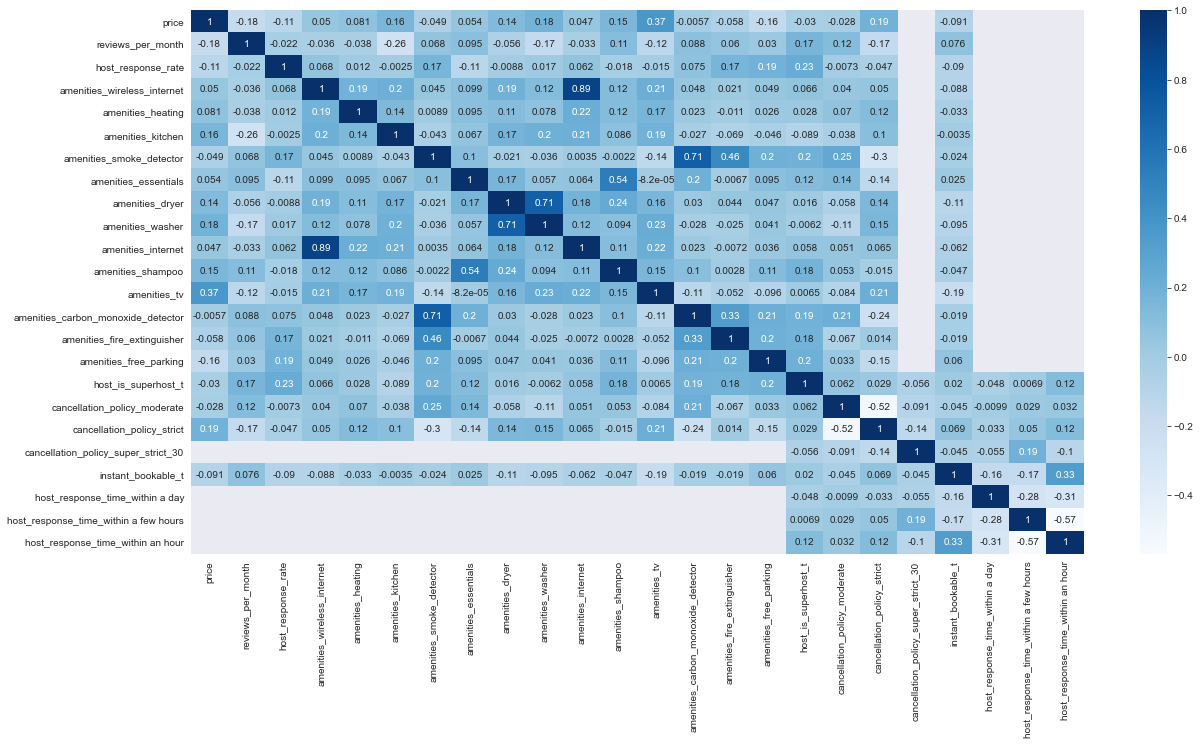

In [269]:
#Using Pearson Correlation
plt.figure(figsize=(20,10))
cor = df_sub.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

#### Feature Selection on the superset of fields

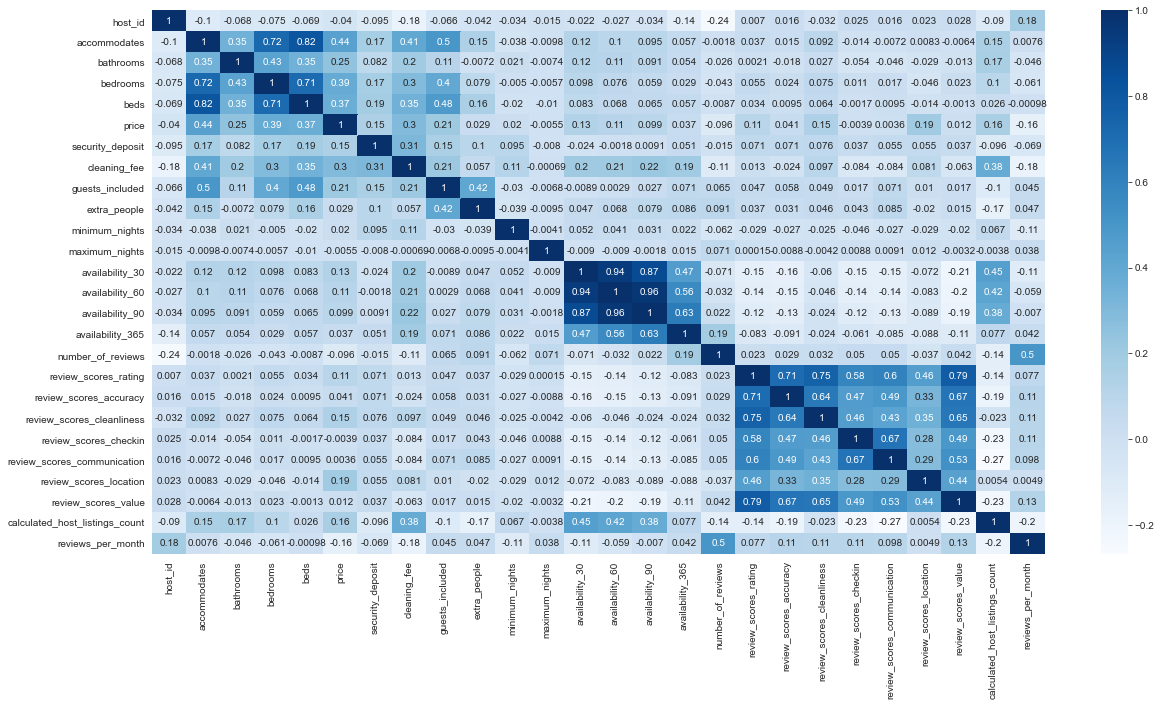

In [270]:
#Using Pearson Correlation
plt.figure(figsize=(20,10))
cor = df_m.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

#### Subset of fields based on the above analysis

In [271]:
df_list = df_m[[ "neighbourhood_cleansed","guests_included", "property_type","room_type", "accommodates", "bathrooms", "bedrooms", 
               "beds", "price", "number_of_reviews", "cancellation_policy", 'security_deposit',
               "reviews_per_month", 'cleaning_fee', 'amenities']]

In [272]:
df_list['security_deposit'].dtypes

dtype('int64')

In [273]:
df_list.columns[df_list.isnull().all()].tolist()

[]

In [274]:
df_list[['security_deposit', 'property_type', 'cleaning_fee']].head()

,security_deposit,property_type,cleaning_fee
0,0,House,35
1,95,Apartment,10
2,0,Apartment,0
3,100,House,50
4,0,House,15


In [275]:
# Clean up Security Deposit by removing nulls and replacing them with 0
#df_list['security_deposit'] 
#df_list['security_deposit'] = df_list['security_deposit'].replace(np.nan, '', regex=True)
df_list['security_deposit'] = df_list['security_deposit'].fillna(0)
df_list['security_deposit'] = df_list['security_deposit'].replace(np.nan, 0)
df_list['security_deposit'] 

<ipython-input-275-5a0eef192245>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list['security_deposit'] = df_list['security_deposit'].fillna(0)
<ipython-input-275-5a0eef192245>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list['security_deposit'] = df_list['security_deposit'].replace(np.nan, 0)


0         0
1        95
2         0
3       100
4         0
       ... 
3580     95
3581    100
3582      0
3583    100
3584      0
Name: security_deposit, Length: 3585, dtype: int64

In [276]:
# Clean up Cleaning Fee by removing nulls and replacing them with 0
df_list['cleaning_fee'] = df_list['cleaning_fee'].replace(np.nan, '', regex=True)
df_list['cleaning_fee'] = df_list['cleaning_fee'].replace('[\$,]', '', regex=True).astype(float)
df_list['cleaning_fee'] = df_list['cleaning_fee'].replace(np.nan, 0)
df_list['cleaning_fee']

<ipython-input-276-ee721a5e0b02>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list['cleaning_fee'] = df_list['cleaning_fee'].replace(np.nan, '', regex=True)
<ipython-input-276-ee721a5e0b02>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list['cleaning_fee'] = df_list['cleaning_fee'].replace('[\$,]', '', regex=True).astype(float)
<ipython-input-276-ee721a5e0b02>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

0       35.0
1       10.0
2        0.0
3       50.0
4       15.0
        ... 
3580     0.0
3581    15.0
3582     0.0
3583     0.0
3584    25.0
Name: cleaning_fee, Length: 3585, dtype: float64

In [277]:
# Cleaning Property Type
df_list['property_type'].unique()

array(['House', 'Apartment', 'Condominium', 'Villa', 'Bed & Breakfast',
       'Townhouse', 'Entire Floor', 'Loft', 'Guesthouse', 'Boat', 'Dorm',
       'Other', nan, 'Camper/RV'], dtype=object)

In [278]:
df_list['property_type'] = df_list['property_type'].replace(np.nan, "none")

<ipython-input-278-f8a72eb78882>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list['property_type'] = df_list['property_type'].replace(np.nan, "none")


#### Amenities Clean up Again

In [279]:
# Clean Amenities field and pick the top ones

amenities_sub =['amenities_wireless_internet|Wireless Internet','amenities_heating|Heating','amenities_kitchen|Kitchen','amenities_smoke_detector|Smoke Detector','amenities_essentials|Essentials','amenities_dryer|Dryer','amenities_washer|Washer','amenities_internet|Internet','amenities_shampoo|Shampoo','amenities_tv|TV','amenities_carbon_monoxide_detector|Carbon Monoxide Detector','amenities_fire_extinguisher|Fire Extinguisher','amenities_free_parking|Free Parking on Premises']
for c in amenities_new_cols:
    c_name,c_desc = c.split('|')
    df_list[c_name] = df_list['amenities'].apply(lambda x: 1 if c_desc in x else 0)

<ipython-input-279-6a3f3ef5d11a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list[c_name] = df_list['amenities'].apply(lambda x: 1 if c_desc in x else 0)


In [280]:
df_list = df_list.drop('amenities', axis = 1)
df_list

,neighbourhood_cleansed,guests_included,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,cancellation_policy,security_deposit,reviews_per_month,cleaning_fee,amenities_wireless_internet,amenities_heating,amenities_kitchen,amenities_smoke_detector,amenities_essentials,amenities_dryer,amenities_washer,amenities_internet,amenities_shampoo,amenities_tv,amenities_carbon_monoxide_detector,amenities_fire_extinguisher,amenities_free_parking
0,Roslindale,1,House,Entire home/apt,4,1.5,2.0,3.0,250,0,moderate,0,NaN,35.0,1,1,1,1,1,1,1,1,1,1,0,1,1
1,Roslindale,0,Apartment,Private room,2,1.0,1.0,1.0,65,36,moderate,95,1.30,10.0,1,1,1,1,1,1,1,1,1,1,1,1,0
2,Roslindale,1,Apartment,Private room,2,1.0,1.0,1.0,65,41,moderate,0,0.47,0.0,1,1,1,1,1,1,1,1,1,1,1,0,1
3,Roslindale,2,House,Private room,4,1.0,1.0,2.0,75,1,moderate,100,1.00,50.0,1,1,1,1,1,1,1,1,1,1,1,1,1
4,Roslindale,1,House,Private room,2,1.5,1.0,2.0,79,29,flexible,0,2.25,15.0,1,1,1,1,1,1,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,Charlestown,1,Apartment,Private room,3,1.0,1.0,1.0,69,4,strict,95,0.34,0.0,1,1,1,1,1,1,0,1,1,0,1,1,1
3581,Allston,1,Apartment,Private room,2,1.0,1.0,1.0,150,0,strict,100,NaN,15.0,1,1,1,1,1,1,1,1,1,1,1,1,1
3582,Charlestown,1,Apartment,Entire home/apt,4,1.0,1.0,1.0,198,0,flexible,0,NaN,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0
3583,Charlestown,1,Apartment,Private room,2,1.0,1.0,1.0,65,2,strict,100,2.00,0.0,0,0,1,0,1,1,1,0,0,0,0,0,0


In [281]:
# Checking numeric columns for null values
num_cols = df_list.select_dtypes(include=['float', 'int', 'int64']).columns
for col in num_cols:
    print(col,df_list[col].isnull().sum())

guests_included 0
accommodates 0
bathrooms 14
bedrooms 10
beds 9
price 0
number_of_reviews 0
security_deposit 0
reviews_per_month 756
cleaning_fee 0
amenities_wireless_internet 0
amenities_heating 0
amenities_kitchen 0
amenities_smoke_detector 0
amenities_essentials 0
amenities_dryer 0
amenities_washer 0
amenities_internet 0
amenities_shampoo 0
amenities_tv 0
amenities_carbon_monoxide_detector 0
amenities_fire_extinguisher 0
amenities_free_parking 0


In [282]:
df_list.columns

Index(['neighbourhood_cleansed', 'guests_included', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'number_of_reviews', 'cancellation_policy', 'security_deposit',
       'reviews_per_month', 'cleaning_fee', 'amenities_wireless_internet',
       'amenities_heating', 'amenities_kitchen', 'amenities_smoke_detector',
       'amenities_essentials', 'amenities_dryer', 'amenities_washer',
       'amenities_internet', 'amenities_shampoo', 'amenities_tv',
       'amenities_carbon_monoxide_detector', 'amenities_fire_extinguisher',
       'amenities_free_parking'],
      dtype='object')

In [283]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - Independent Variables
    y - Dependent Variable
    
    Perform to obtain the correct X and y objects
    This function cleans df using the following steps to produce X and y:
    1. Select the numeric variables in the dataset
    2. Impute Mean to fill null values for numeric variables
    3. Select the categorical variables
    4. Creates dummy columns for the categorical variables
    5. Create X as all columns except Price
    6. Create y as Price column
    '''
    num_vars= df.select_dtypes(include=['int','float', 'int64']).copy().columns

   
    for var in num_vars:
        df[var].fillna((df[var].mean()), inplace=True)       
    
# Assign N/A to applicable host fields
    #df['host_response_time'] = df['host_response_time'].fillna('N/A')
    #df['host_acceptance_rate'] = df['host_acceptance_rate'].fillna('N/A')

    #df['host_response_rate'] = df['host_response_rate'].apply(lambda x: 0 if x == 'N/A' else x)
    #df['host_response_rate'] = df['host_response_rate'].replace('[\%,]', '', regex=True).astype(float)
    #df['host_response_rate'] = df['host_response_rate'].fillna(0)

    # Drop record with empty value for property_type
    df = df_list.dropna(subset=['property_type'], axis=0)

    # Clean security_deposit, cleaning_fee and extra people
    df['security_deposit'] = df['security_deposit'].replace('[\$,]', '', regex=True).astype(float)
    df['cleaning_fee'] = df['cleaning_fee'].replace('[\$,]', '', regex=True).astype(float)
    #df['extra_people'] = df['extra_people'].replace('[\$,]', '', regex=True).astype(float)
    df['security_deposit'] = df['security_deposit'].fillna(0)
    df['cleaning_fee'] = df['cleaning_fee'].fillna(0)

    # Drop columns experiences_offered, market and jurisdiction_name
    

    # Clean up city names
    #df['city'] = df['city'].str.lower()
    #df['city'] = df['city'].str.strip()
    #df['state'] = df['state'].str.lower()
        
    cat_cols = df.select_dtypes(include=['object']).columns
    #cat_fields = df.select_dtypes(include=['object']).columns  
    for var in cat_cols:
        #for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
   
    #df = pd.get_dummies(df, columns=cat_fields)
    #df.head()
        
    X = df.drop(columns=['price'], axis=1)
    y = df['price']
    
    return X, y


In [284]:
X, y = clean_data(df_list)

#### Checking Cleaned up Numerical Fields

In [285]:
num_cols = df_list.select_dtypes(include=['float', 'int', 'int64']).columns
for col in num_cols:
    print(col,df_list[col].isnull().sum())

guests_included 0
accommodates 0
bathrooms 0
bedrooms 0
beds 0
price 0
number_of_reviews 0
security_deposit 0
reviews_per_month 0
cleaning_fee 0
amenities_wireless_internet 0
amenities_heating 0
amenities_kitchen 0
amenities_smoke_detector 0
amenities_essentials 0
amenities_dryer 0
amenities_washer 0
amenities_internet 0
amenities_shampoo 0
amenities_tv 0
amenities_carbon_monoxide_detector 0
amenities_fire_extinguisher 0
amenities_free_parking 0


#### Checking Cleaned up Categorical fields

In [286]:
cat_cols = df_list.select_dtypes(include=['object']).columns
for col in cat_cols:
        print(col,df_list[col].isnull().sum())

neighbourhood_cleansed 0
property_type 0
room_type 0
cancellation_policy 0


In [287]:
X.shape

(3585, 64)

In [288]:
X.columns

Index(['guests_included', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'number_of_reviews', 'security_deposit', 'reviews_per_month',
       'cleaning_fee', 'amenities_wireless_internet', 'amenities_heating',
       'amenities_kitchen', 'amenities_smoke_detector', 'amenities_essentials',
       'amenities_dryer', 'amenities_washer', 'amenities_internet',
       'amenities_shampoo', 'amenities_tv',
       'amenities_carbon_monoxide_detector', 'amenities_fire_extinguisher',
       'amenities_free_parking', 'neighbourhood_cleansed_Back Bay',
       'neighbourhood_cleansed_Bay Village',
       'neighbourhood_cleansed_Beacon Hill', 'neighbourhood_cleansed_Brighton',
       'neighbourhood_cleansed_Charlestown',
       'neighbourhood_cleansed_Chinatown', 'neighbourhood_cleansed_Dorchester',
       'neighbourhood_cleansed_Downtown', 'neighbourhood_cleansed_East Boston',
       'neighbourhood_cleansed_Fenway', 'neighbourhood_cleansed_Hyde Park',
       'neighbourhood_cleansed_Jamaica 

#### Price Modeling

In [289]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [290]:
# Create train and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2509, 64) (2509,)
(1076, 64) (1076,)


In [291]:
#Initialize linear regression model and fit it to training data set
lm = LinearRegression(normalize=True) 
lm.fit(X_train, y_train) 
        
# Predict and score the model
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test) 
train_score = r2_score(y_train, y_train_pred)
test_score = r2_score(y_test,y_test_pred)
print("The rsquared score on the training data was {}.  The rsquared score on the test data was {}.".format(train_score, test_score))

The rsquared score on the training data was 0.4265118299547168.  The rsquared score on the test data was 0.2874313834445893.


In [292]:
#Predict and score the model
y_train_pred = lm.predict(X_train)
print("r-squared - training data is {} on {} values. The RMSE is {}".format(r2_score(y_train, y_train_pred), len(y_train), mean_squared_error(y_train, y_train_pred)))
y_test_pred = lm.predict(X_test) 
print("r-squared   testing data is {} on {} values.  The RMSE is {}".format(r2_score(y_test, y_test_pred), len(y_test), mean_squared_error(y_test, y_test_pred)))

r-squared - training data is 0.4265118299547168 on 2509 values. The RMSE is 10984.653666088121
r-squared   testing data is 0.2874313834445893 on 1076 values.  The RMSE is 20395.692685211015


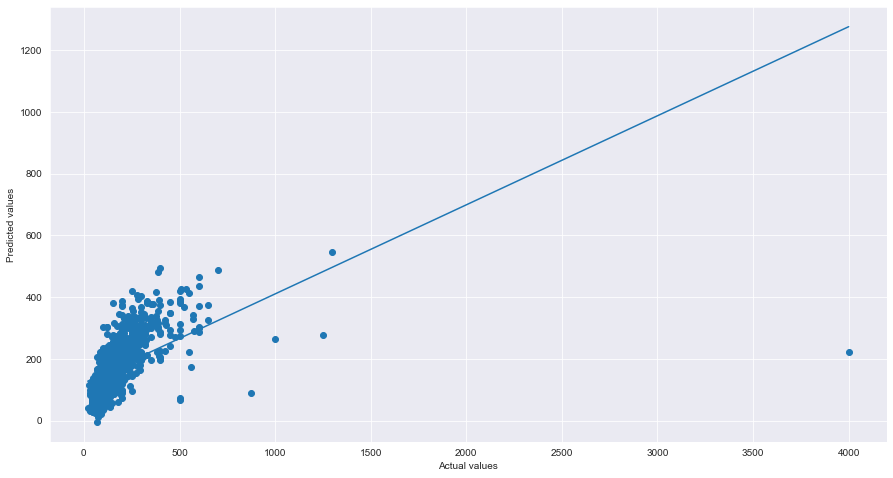

In [293]:
plt.figure(figsize=(15,8))
plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_test_pred, 1))(np.unique(y_test)))